/usr/lib/python3.4/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


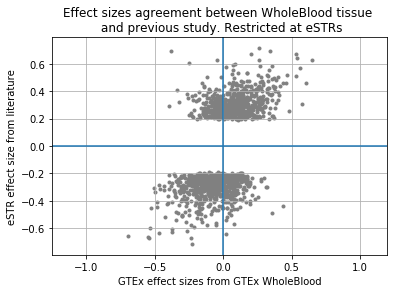

1033 ===== 1442 +++ 1442



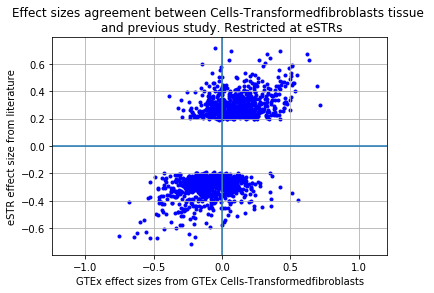

1044 ===== 1454 +++ 1454



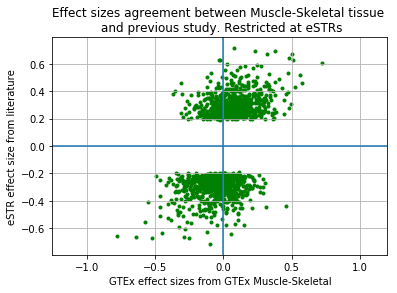

975 ===== 1454 +++ 1454



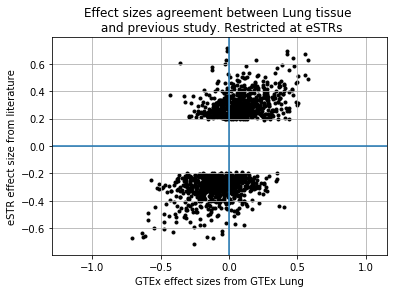

1041 ===== 1493 +++ 1493



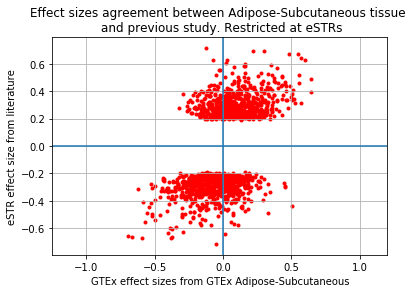

1029 ===== 1477 +++ 1477



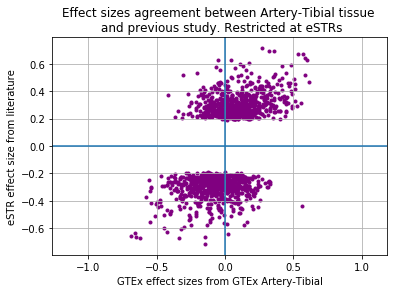

1025 ===== 1471 +++ 1471



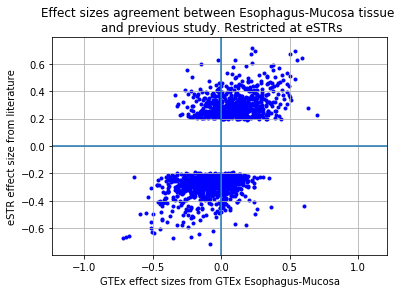

1050 ===== 1489 +++ 1489



In [12]:
tissu = ['WholeBlood','Cells-Transformedfibroblasts','Muscle-Skeletal','Lung','Adipose-Subcutaneous','Artery-Tibial','Esophagus-Mucosa']

import matplotlib.pyplot as plt
import pandas as pd

##Old study
oldestr = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/2016_estrs_table.csv',sep=',')
c=['','grey','b','g','black','r','purple','blue' ]; i=0

for Tissue in tissu:
    i=i+1
    ##Get current study
    newestr = pd.read_csv('/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/'+Tissue+'/Lin_Reg_OutFin.txt',sep='\t')
        ##Reformat gene name without version to match old
    G2 = [x.split('.')[0] for x in list(newestr['gene'])]           
    newestr['gene']=G2

    ##only select gene present in both dataset
    NEW = newestr.loc[newestr['gene'].isin(oldestr['gene'])]     #New data in old
    OLD = oldestr.loc[oldestr['gene'].isin(NEW['gene'])]         #Old data in new

    ##adjusting tart position in old data
    OLD['str.start'] = OLD['str.start']-1  #Adjusting hipstr n lobstr POS
    #OLD['str.start'] = list(OLD['start'])
    
    #Select 3 col of interest 
    Int=['gene', 'str.start', 'beta','p.wald','signif.estr']
    G0= OLD.loc[:,Int]      #X_o.loc[:,Int]
    GN= NEW.loc[:,Int]      #X_n.loc[:,Int]

    G0=  G0[G0['signif.estr']==True]
    newrows={x['gene']+'-'+str(int(x['str.start'])) : x['beta'] for y,x in GN.iterrows()}
    oldrows={x['gene']+'-'+str(int(x['str.start'])): x['beta'] for y,x in G0.iterrows()}
    #print(len(newrows.keys()), '\t',len(oldrows.keys()))
    Key = [x for x in newrows.keys() if x in oldrows.keys()]
    #print (len(Key))
    Xn = [newrows[x] for x in Key]
    Yo = [oldrows[x] for x in Key]

    #Tissue vs nature paper 
    plt.scatter(Xn,Yo,color=c[i],marker='.')#,edgecolors='b')
    #plt.xlim(-1, 1)
    #plt.ylim(-1, 1)
    plt.ylabel('eSTR effect size from literature')
    plt.xlabel('GTEx effect sizes from GTEx '+Tissue)
    plt.title('Effect sizes agreement between '+Tissue+' tissue \n and previous study. Restricted at eSTRs')
    plt.axis('equal')
    plt.axhline(y=0)
    plt.axvline(x=0)
    plt.grid()
    plt.show()
    CC=[Xn[i]*Yo[i] for i in range(len(Xn))]
    print(len([x for x in CC if x>0]),"=====",len(Xn), '+++', len(Yo))
    print()
    
    

In [8]:
len(Xn) 

1442

In [ ]:
Whole blood 71.64%
Fibroblast  71.80%
Muscle skeletal 67.06%
Lung     69.73%
Adipose subcutaneous 69.66%
Artery tibial    69.68%
Esophagus    70.52%

